# NIH.AI Workshop-1

## Discovering Function Using Small-molecule Structure Information: Generating Descriptor Data and Analysis
S.Ravichandran
(ravichandrans at mail dot nih dot gov)

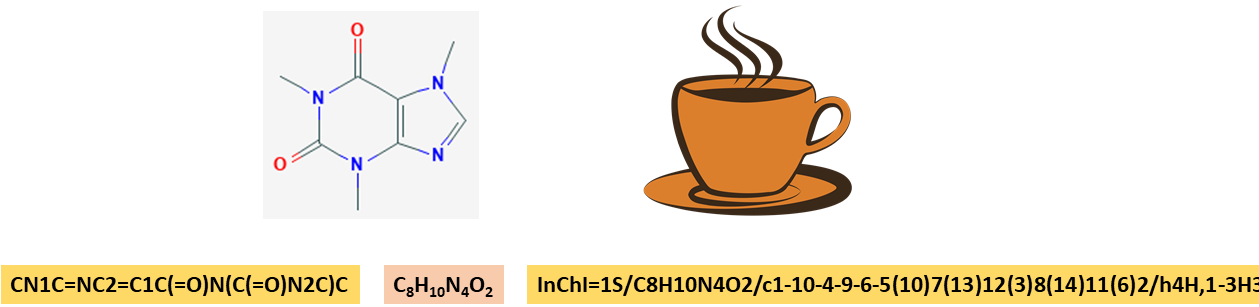

In [2]:
from IPython.core.display import Image
Image(filename='Img/SMILES-Figures.png')

## 1. Preliminary Information

Please [click on this link](Supp-ipynb/preliminary-information.ipynb) to view the preliminary information about the workshop. 

## 2. Software-setup Information 

Please [click on this link](Supp-ipynb/software-setup.ipynb) here to see how to install the software needed this tutorial on your own system. 

## 3. Molecular/Chemical information 

Please [click on this link](Supp-ipynb/molecular-information.ipynb) to read about the basics of molecular/chemical information (SMILES/SDF/PDB etc.). 


## 4. Load the libraries

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import Image
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor

#Needed to show molecules
from rdkit.Chem.Draw import IPythonConsole 

from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

# Download this from http://pypi.python.org/pypi/futures
# for parallel jobs (especially for mordred large molecular dataset)
from concurrent import futures

RDKit WARNING: [11:28:21] Enabling RDKit 2019.09.3 jupyter extensions


### 4a. Checking directory/folder location (not important if you are running the cloud instance)
Make sure you are in the directory or folder that has **Img** and **Data** subfolders/directories. You can check using using ```os.chdir``` command (see below for for the format)

In [4]:
os.getcwd()
# os.chdir('REPLACE_YOUR_DIR_NAME')

'C:\\Users\\ravichandrans\\Documents\\GitHub\\SRWkshp1'

## 5. Exploring molecular structures using a recent publication

For this hands-on, we are going to look at a recent paper published by Simpson et al (see below) on c-Abl kinase activators. The PubMed link for the manuscript is [https://www.ncbi.nlm.nih.gov/pubmed/?term=30689376](https://www.ncbi.nlm.nih.gov/pubmed/?term=30689376)  

The protein system that is explored in this manuscript is c-Abl kinase (PDB: https://www.rcsb.org/structure/6NPV; UniProt: https://www.uniprot.org/uniprot/P00519). The small molecule inhibitors mentioned in this manuscript are Imatinib, Dastinib and GNF5/ABL001 and the activator, DPH. 

## 6. Where do we get the SMILES strings (molecular structural information) for molecules? 

To visualize small molecules, we need atomic information. This can be obtained from different sources and formats (PubChem/DrugBank etc.; Formats: SMILES, PDB, Mol, sdf etc.). We will use SMILES strings for molecular information. There are many sources (check the last section, Supporting pages for details).


PubChem (https://pubchem.ncbi.nlm.nih.gov/) is a great resource for small molecule information. Please [click on this link](Supp-ipynb/searching-pubchem.ipynb) for a short demonstration on how to search for compounds in PubChem library. 


### 6a. Use Chemoinformatics library, rdkit, for small-molecule related information

Go to the following link, https://www.rdkit.org/, to learn about rdkit

## 7. Let us read in the small molecule inhibitors/activators described in the paper. 
The following is figure-1 from the manuscript mentioned above; https://www.ncbi.nlm.nih.gov/pubmed/?term=30689376 )

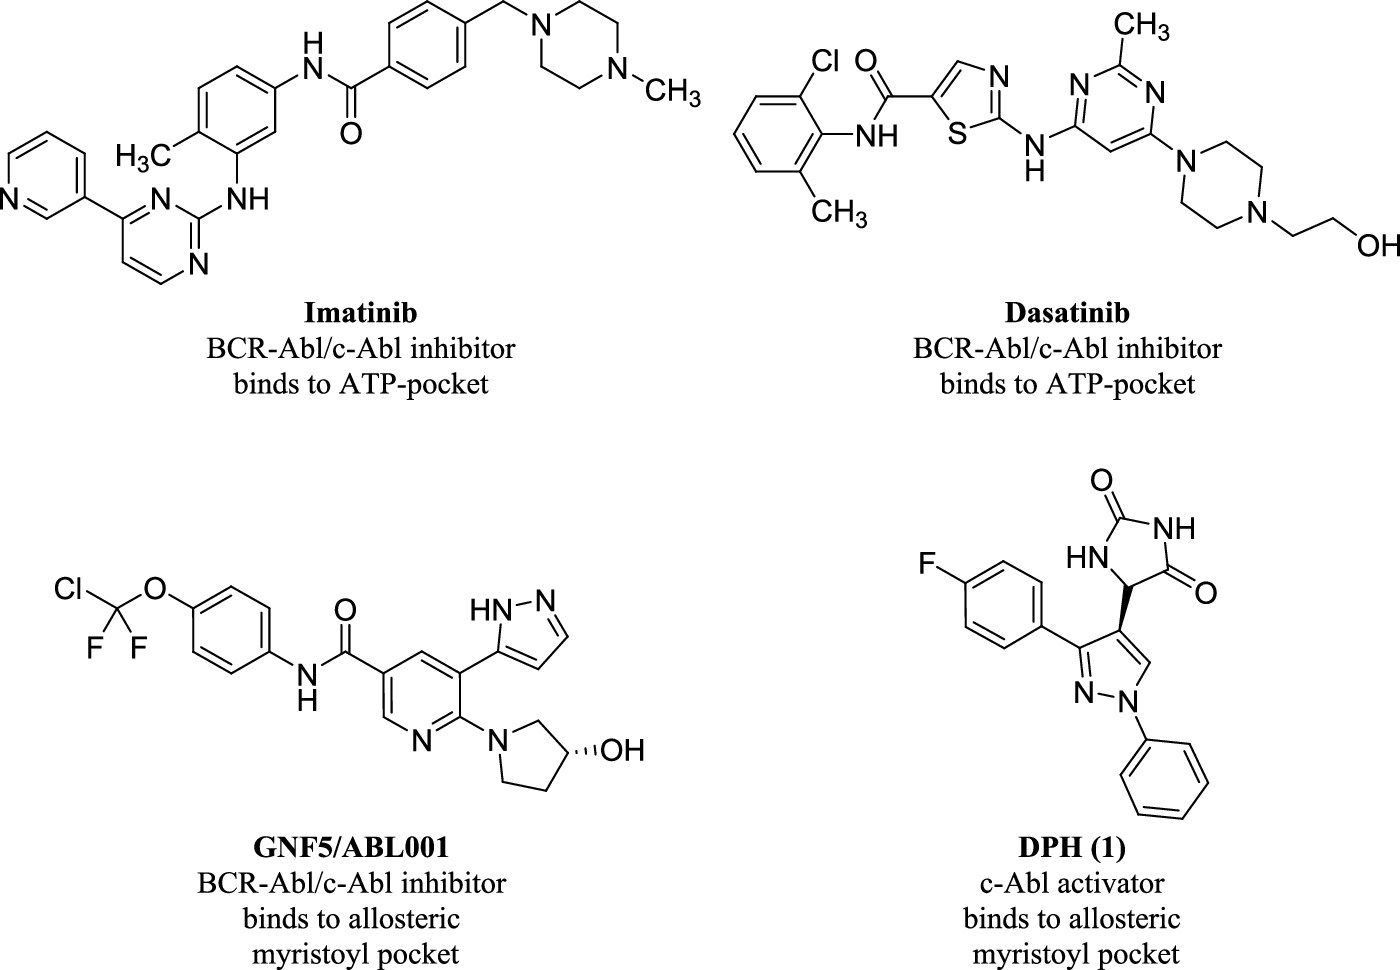

In [5]:
Image(filename='Img/jm-2018-01872w_0001.jpeg', width=700)

Let us use SMILES string to load imatinib

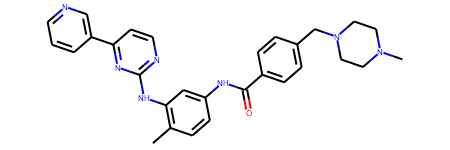

In [6]:
imatinib = 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5'
imatinib_m = Chem.MolFromSmiles(imatinib)
imatinib_m

### Options that can make molecules look better

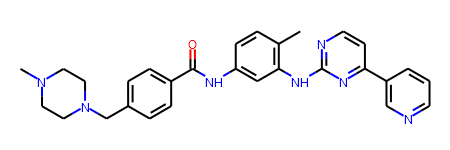

In [7]:
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(imatinib_m)
imatinib_m

### Let us read the rest of the compounds:

In [8]:
IPythonConsole.molSize = (450,200)
dasatinib = 'CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(=N3)C)N4CCN(CC4)CCO'
dasatinib_m = Chem.MolFromSmiles(dasatinib)
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(dasatinib_m)
# dasatinib_m

IPythonConsole.molSize = (450,200)
gnf5 = 'C1=CC(=CC(=C1)C(=O)NCCO)C2=CC(=NC=N2)NC3=CC=C(C=C3)OC(F)(F)F'
gnf5_m = Chem.MolFromSmiles(gnf5)
rdDepictor.Compute2DCoords(gnf5_m)
# gnf5_m

IPythonConsole.molSize = (450,200)
dph = 'C1=CC=C(C=C1)N2C=C(C(=N2)C3=CC=C(C=C3)F)C4C(=O)NC(=O)N4'
dph_m = Chem.MolFromSmiles(dph)
rdDepictor.Compute2DCoords(dph_m)
# dph_m

0

### What about mol format? 

Here [click on this link](Supp-ipynb/readmol.ipynb) is an example on how to load Imatinib molecule using mol format. 


## 8. How to get help in rdkit?

Other than online help, https://www.rdkit.org/docs/index.html, we can also get inline help like the following command.

In [10]:
help(imatinib_m.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)arg1 [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.
        
          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated
        
    
        C++ signature :
            int GetNumAtoms(class RDKit::ROMol [,int=-1 [,bool=True]])



### 8a. Auto-complete 
For example, if you type imatinib_m.```<TAB>```, you will see a list of sub-commands that can be used with "imatinib_m" object (see below)

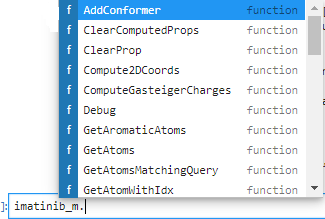

In [9]:
Image(filename='Img/cdkit_tab_help.png')

In [10]:
# Tab to get additional help on commands
# uncomment the following line and hit <TAB> to seee how this works
# imatinib_m.

## 9. Displaying multiple molecules 

Molecular display in a grid. 
Useful for presentations/seminars/manuscripts

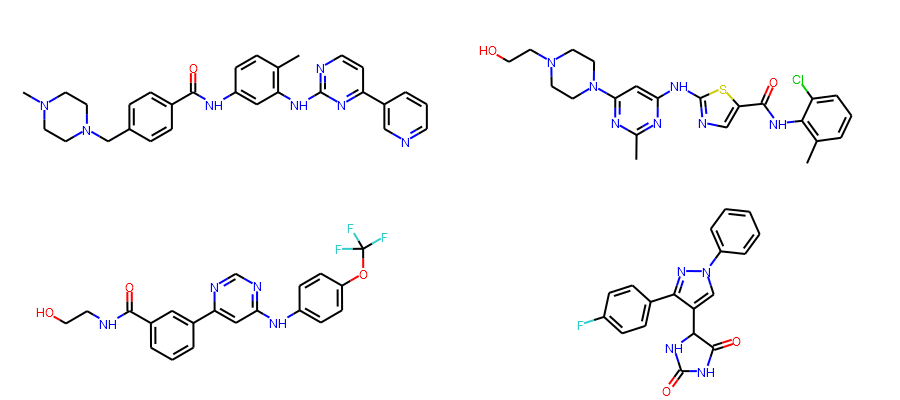

In [12]:
IPythonConsole.molSize = (450,400)
molecules = [ imatinib_m, dasatinib_m, gnf5_m, dph_m ]
Draw.MolsToGridImage(molecules, molsPerRow = 2, subImgSize=(450, 200))

### 9a. How to save the molecular grid image to a file? 

In [12]:
img = Draw.MolsToGridImage(molecules, molsPerRow = 2, subImgSize=(450, 200))

# uncomment the following line to save the molecular display in a file
# img.save('testimage.png')

## 10. Pharmacophore: How to see the presence of a core component fragment in a list of molecular library? 

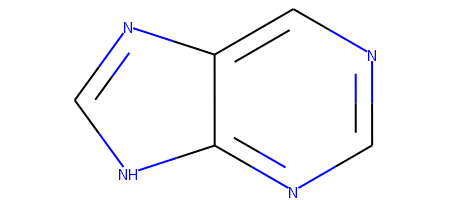

In [13]:
IPythonConsole.molSize = (450,200)
core = Chem.MolFromSmiles( 'c1ncc2nc[nH]c2n1' )
rdDepictor.Compute2DCoords(core)
core

#### Note to read a list of molecules, use ```Chem.SDMolSupplier```

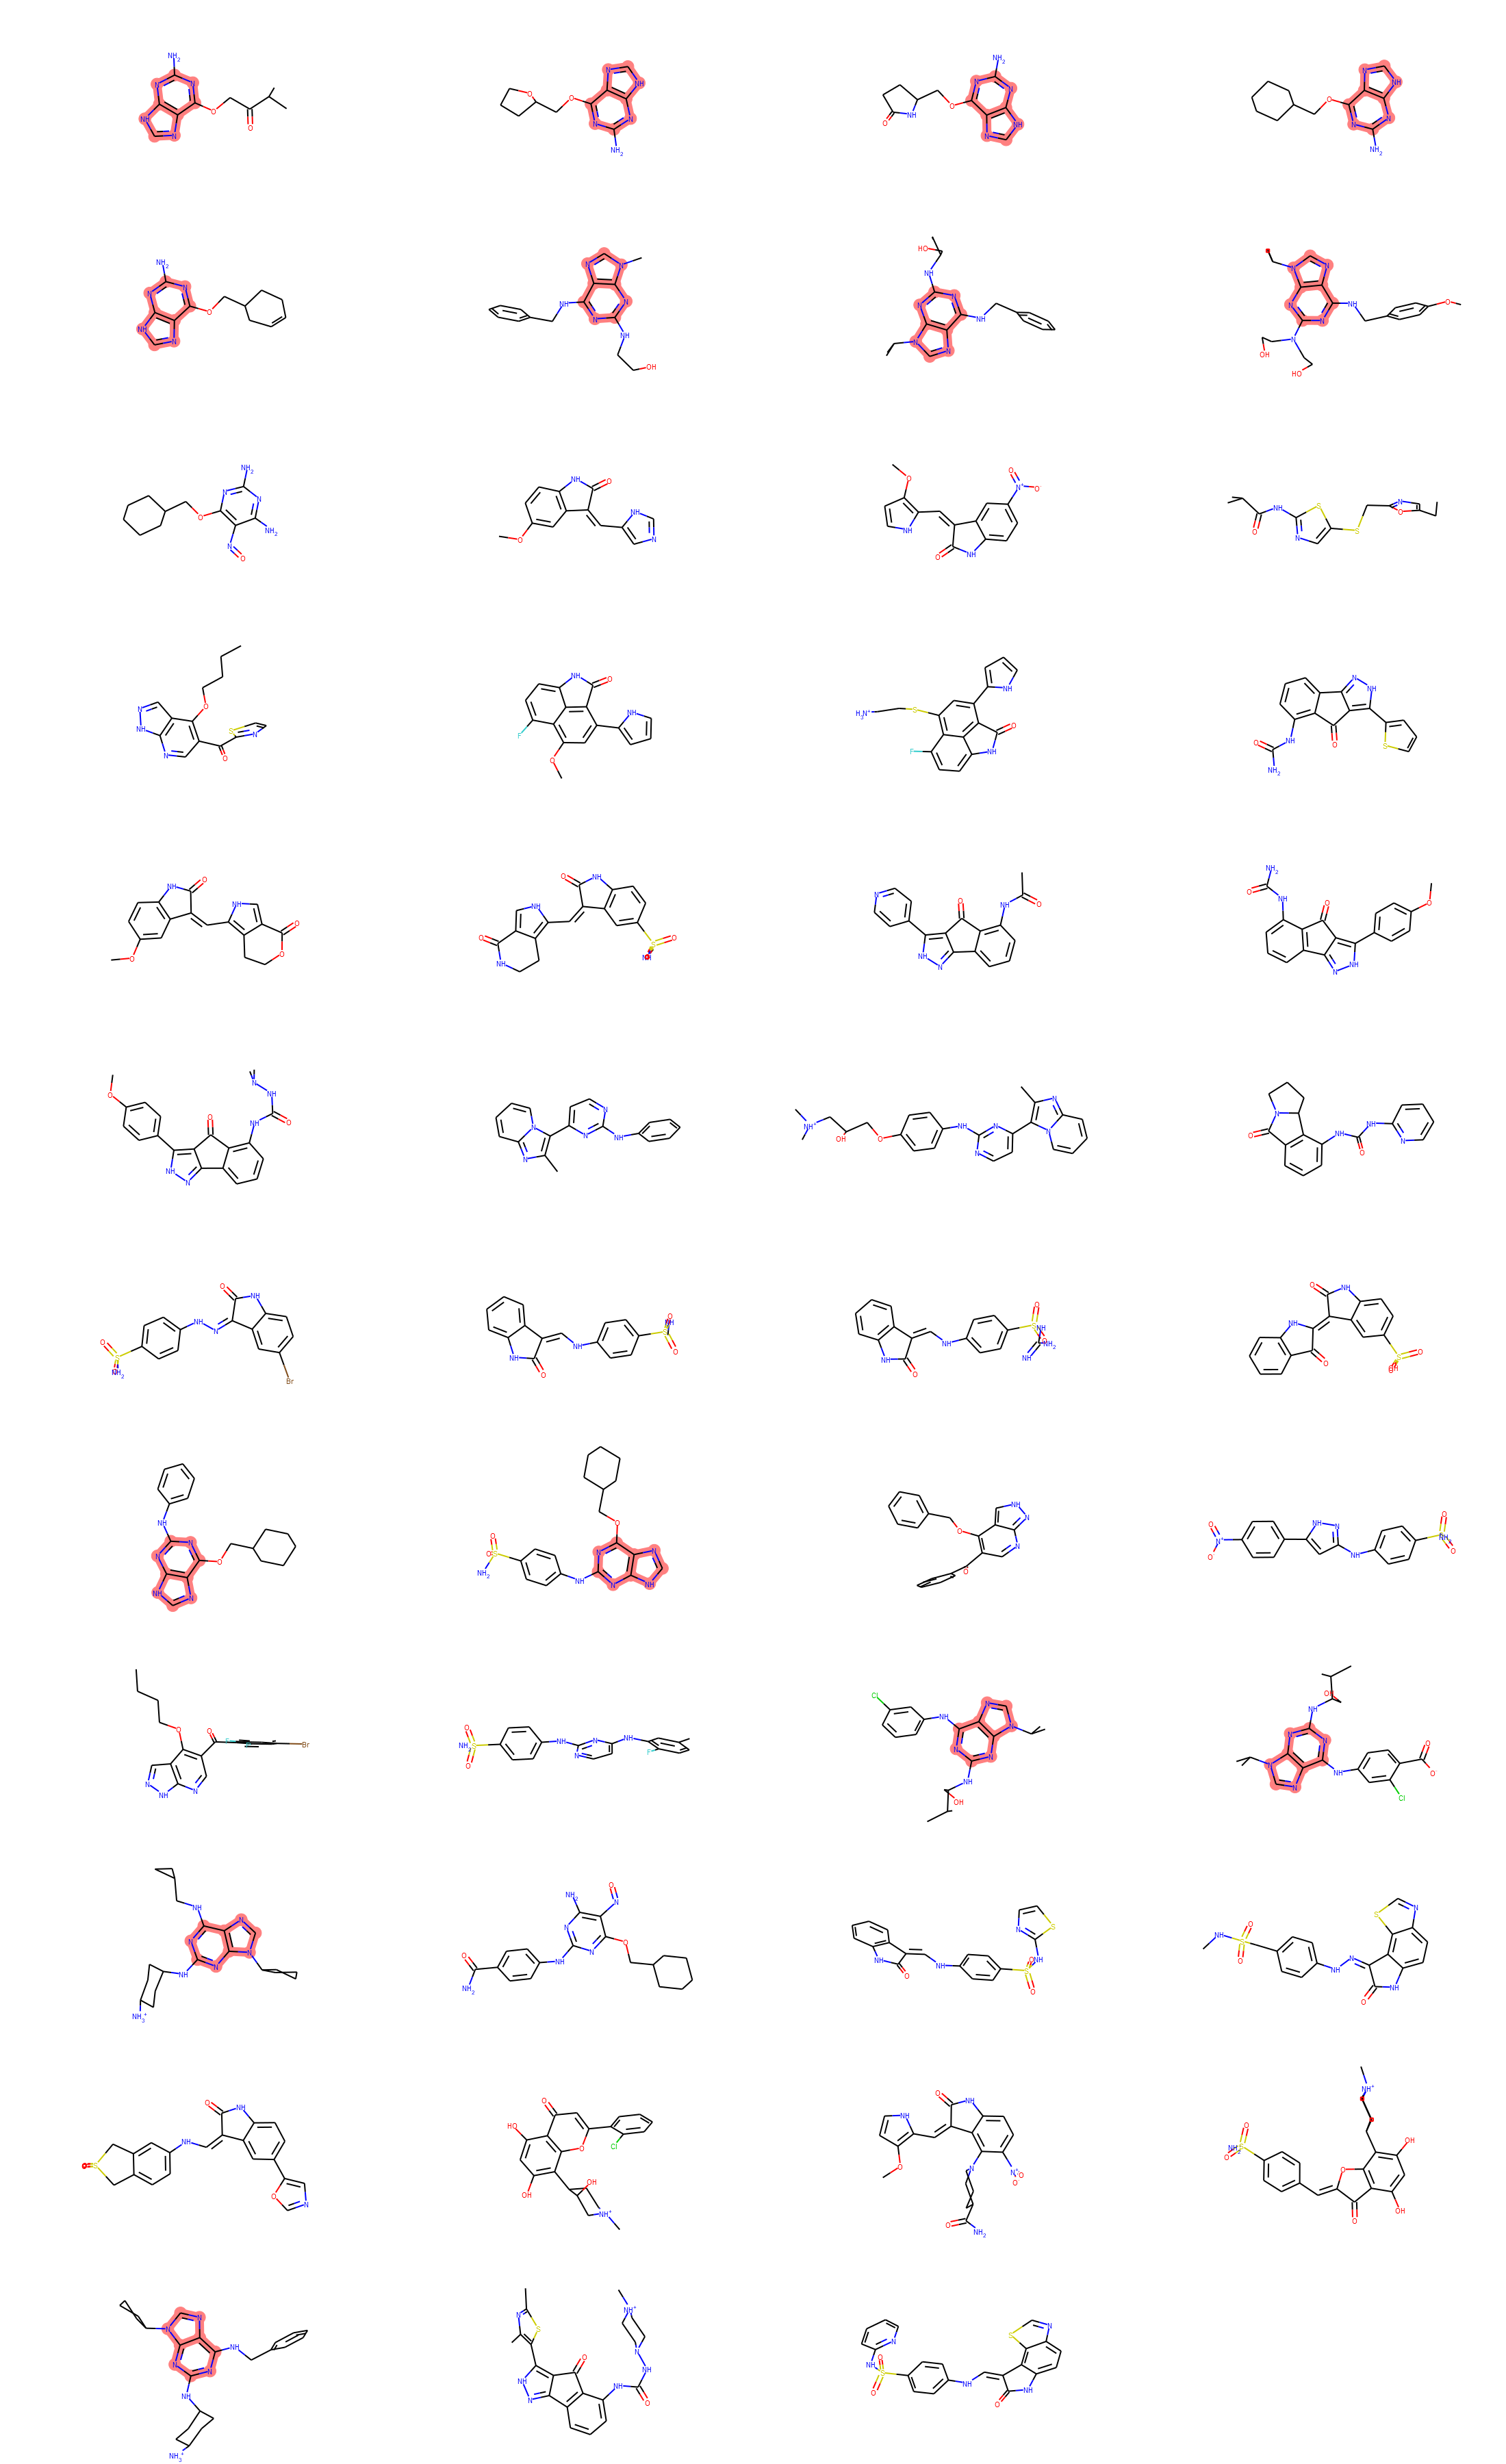

In [14]:
sdf = Chem.SDMolSupplier('Data/cdk2.sdf.txt') 
mols = [  m for m in sdf ]
core = Chem.MolFromSmiles( 'c1ncc2nc[nH]c2n1' )

# highlightAtomLists is list of atom list that you want to highlight.
Draw.MolsToGridImage( mols, molsPerRow=4, subImgSize=(550, 300), highlightAtomLists=[mol.GetSubstructMatch(core) for mol in mols] )

## 11. 3D structure display

In [15]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(imatinib_m, size=(400, 400), confId=0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## 12. Reading Protein structure data

Using cdkit, we can also read/analyze a PDB (protein/DNA) file. Let us view human ABL1 protein mentioned in the simpson etal paper. ABL1_human is a non-receptor tyrosine protein kinase. It plays a key role in many human diseases. ABL1 has 1,130 amino acids. The PDB ID 6NPV contains structural information for a smaller segment (residues 229 - 512) of the protein.  

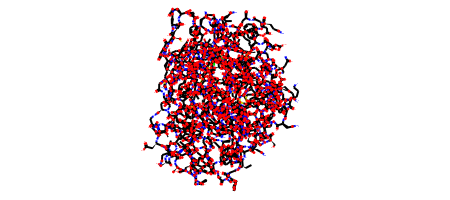

In [16]:
p_6npv = Chem.MolFromPDBFile('Data/6npv_a.pdb', sanitize = True, removeHs = True)
p_6npv

You can do better with py3Dmol. Here is an image of the same ABL1 protein structure displayed in cartoon format.

In [17]:
import py3Dmol
p = py3Dmol.view(query='mmtf:6npv')
p.setStyle({'cartoon': {'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### 12a. Let us display multiple molecules in different style in a grid

In [18]:
# code chunk is from the py3D manual. I have made small changes Ravi
# sdf file format 
imatinib_mblock = Chem.MolToMolBlock(imatinib_m)
# print(imatinib_mblock)

view = py3Dmol.view(query='pdb:6npv', linked=False, viewergrid=(2,2))
view.setViewStyle({'style':'outline','color':'blue','width':0.1})
view.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'spectrum'}},viewer=(0,1))
view.setStyle({'stick':{'colorscheme':'greenCarbon'}},viewer=(1,0))
view.setStyle({'cartoon':{'color':'spectrum'}},viewer=(1,1))
view.removeAllModels(viewer=(0,0))
view.addModel(imatinib_mblock,viewer=(0,0))
view.setStyle({'stick':{}},viewer=(0,0))
view.zoomTo(viewer=(0,0))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### 12b. Extracting information from PDB and even read in Fasta file:

Please [click on this link](Supp-ipynb/fastaanalysis.ipynb) to learn how to read a fasta/PDB file and do some basic analysis. 

## 13. Energy minimization 

It is better to do energy minimization outside of rdkit. If you want to clean up compounds for visualization, the option is available.
Please [click on this link](Supp-ipynb/EM.ipynb) to learn the options for energy minimzation of small molecules. 

## 14. Structure alignment

We take two small molecules cocrystallized from two different protein structures (PDB IDs: 1PPC and 1DWD). 
We can align them and report RMSD and an alignment score. Click 
Please [here](Supp-ipynb/str-alignment.ipynb) to learn how to do this in rdkit.

## 15. Visualization of molecular properties:

`SimilarityMaps` funciton can be used to visualize (color scheme) atom-based descriptors such as partial charges. 
For this example, we are going to compute Gasteiger partial charges for imatinib. Let us view the molecule first 
and then compute/map partial charges to the atoms. 

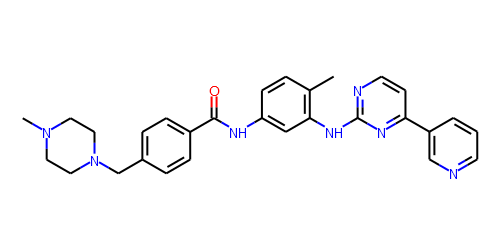

In [19]:
from ipymol import viewer as pymol
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms

IPythonConsole.molSize = (500,250)
mol = imatinib_m
mol

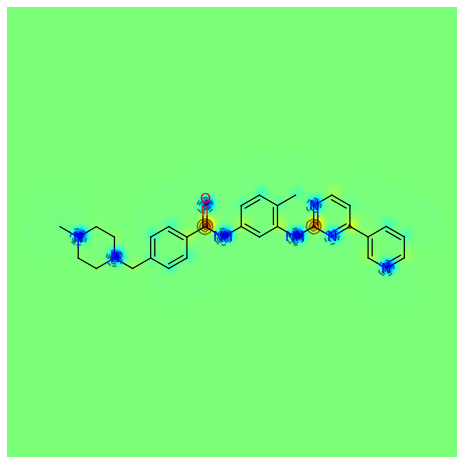

In [20]:
from rdkit.Chem.Draw import SimilarityMaps

AllChem.ComputeGasteigerCharges(mol)

contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Please visit this informative link, 
https://github.com/rdkit/UGM_2018/blob/master/Notebooks/Landrum_Whats_New.ipynb
to learn the improvements in rdkit.

## 16. Generating molecular properties

For this section, we will be using cdkit and Mordred (a molecular descriptor calculator) to generate molecular descriptors. Follow the links shown below for information on mordred calculator:

* https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y
* https://github.com/mordred-descriptor/mordred


### 16a. Let us generate fingerprints (descriptors) for Imatinib

We will use Morgan Fringerprints. You can read about the details here, 
https://www.ncbi.nlm.nih.gov/pubmed/20426451 and here, https://www.daylight.com/dayhtml/doc/theory/theory.finger.html

Here is an informative article on the details of Morgan fingerprints, http://rdkit.blogspot.com/2016/03/explaining-morgan-similarity.html

Note most of the ideas are based on examples from cdkit manual. In a nutshell, each fragment in a molecule correspond to a bit. Two similar molecular fingerprints will have many common bits.

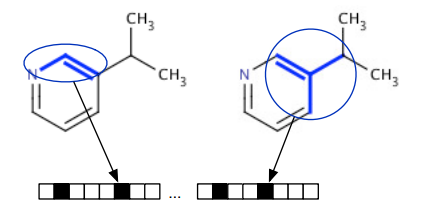

In [21]:
Image(filename='Img/FPComp.PNG',width = 300, height = 300 )
# (Following figure is based on an an online presentation)

Let us use the two molecules, mocetinostat and imatinib as an example. First let us visualize the molecules (see below), then compute finger-prints and use Dice similarity measure (https://www.daylight.com/dayhtml/doc/theory/theory.finger.html#RTFToC88) to compare the fingerprintes.

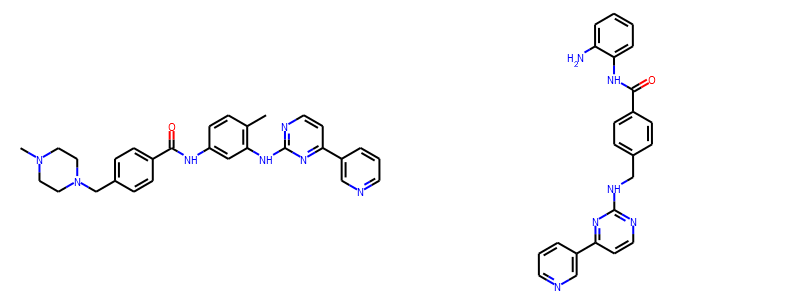

In [22]:
IPythonConsole.molSize = (450,200)
mocetinostat = 'C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC3=NC=CC(=N3)C4=CN=CC=C4'
mocetinostat_m = Chem.MolFromSmiles(mocetinostat)

rdDepictor.Compute2DCoords(mocetinostat_m)
rdDepictor.Compute2DCoords(imatinib_m)

molecules1 = [imatinib_m, mocetinostat_m]

Draw.MolsToGridImage(molecules1, subImgSize=(400, 300), molsPerRow = 2)

In [23]:
from rdkit import DataStructs
fp1 = AllChem.GetMorganFingerprint(mocetinostat_m,2)
fp2 = AllChem.GetMorganFingerprint(imatinib_m,2)
print(DataStructs.DiceSimilarity(fp1,fp2))

0.7040816326530612


### We can convert fingerprints (FP) to bits and view them 

In [24]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(imatinib_m, radius=2, bitInfo=bi)
bits = fp.ToBitString()
bits

'000000000000001000000000000000000000000000000000000000000000000000000000001000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000001000000000000000100000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000001000000000000000000000000000100001000000000000000000000000000000000000000000000000010000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000010000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000010010000000000000000000100000000000000000000000000000000000100000000000000000000000000000001000000000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000000001000000000000000000

## 17. Mordred: For computing descriptors

We will be using a python package called  mordred for generating descriptors. Mordred Github Page: https://github.com/mordred-descriptor/mordred and click here to see the complete list of mordred descriptors,
https://mordred-descriptor.github.io/documentation/master/descriptors.html

### 17a. Comptue molecular descriptors for Imatinib

In [25]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

# calculate single molecule
# mol = Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')
# mol_prop = calc(imatinib_m)
# print(mol_prop[:10])

# To list all the descriptors total 1613
# print(calc.descriptors)
# print(len(calc.descriptors))

**Please inspect the descriptor table before you use them in other calculations. Especially when you are generating all the descriptors, some of the columns may contain NA or Nan etc.**

In [26]:
# calculate multiple molecule
mols = [Chem.MolFromSmiles(smi) for smi in [imatinib, dasatinib, gnf5, dph]]

# as pandas
df = calc.pandas(mols)

100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


In [27]:
df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,29.198227,19.516970,0,2,49.161634,2.372244,4.744487,49.161634,1.328693,4.541483,...,10.415502,73.587263,493.259009,7.253809,5324,56,194.0,224.0,9.972222,8.083333
1,25.731643,19.151718,0,1,42.312870,2.394767,4.762938,42.312870,1.282208,4.422390,...,10.323283,82.603238,487.155722,8.256877,3723,50,172.0,200.0,10.472222,7.277778
2,23.132682,16.941805,0,0,38.063201,2.370962,4.741923,38.063201,1.268773,4.312334,...,10.143881,65.313648,418.125275,8.896282,2918,42,152.0,171.0,10.090278,6.597222
3,19.924959,16.140292,0,0,32.867760,2.498596,4.828813,32.867760,1.314710,4.170130,...,10.150621,75.953704,336.102254,8.844796,1431,38,136.0,162.0,7.250000,5.388889


### 17b. Mordred has many functions and it is not possible to cover all of them.

Please [click on this link](Supp-ipynb/mordredfunctions.ipynb) to learn how to generate only selected descriptors and how to generate your own descriptor combinations. The last option might be useful for QSAR modeling. 

### 18. Exercises (if time-permits)

<div class="alert alert-success">
    <b>Exercise-1: Create a visual display of the following RAS inhibitors and identify whether the molecules have napthelene fragment </b>:
     <ul>
      <li>
          Here is a list of PubChem CIDs:
132145288 
132145444 
134325670
134326383
134325731
138911339
137278711
132145654
134817260
137796984
134817259
          
Your task is to complete the following things:
          <li> Create a SMILES string list file of the above mentioned KRAS inhibitors. You can use PubChem ( https://pubchem.ncbi.nlm.nih.gov/) for this task
          <li> Read the file created in the previous step to create a grid display (discussed in the workshop) of the molecules 
          <li> Identify whether the molecules have napthelene fragment
          <ul> <li> Napthelene are fused benzene rings; you can read/view the napthalene fragment here, href="https://en.wikipedia.org/wiki/Naphthalene"</a>) </li> 
    </ul>      
    </ul>
</div>

<div class="alert alert-info">
    <b> Solution for Exercise-1: Try on your own. If you want to see the solution, uncomment the following line by removing the pound (#) sign and run it to load the solution. Then run the solution containing chunk to see the output</b>
</div>

In [28]:
# %load Solutions/solutions1.py

<div class="alert alert-success">
    <b>Exercise-1a (continuation of Exercise-1): Use mordred to create molecular descriptors (see below) for the RAS inhibitors and save the output in a csv formatted file. Compute only the following descriptors: 'MW', 'nHBDon','nRing','nHBAcc','nRot','SLogP' and 'TopoPSA'</b>:
</div>

<div class="alert alert-info">
    <b> Solution for Exercise-1a: Try on your own. If you want to see the solution, uncomment the following line by removing the pound (#) sign and run it to load the solution. Then run the solution containing chunk to see the output</b>
</div>

In [29]:
# %load Solutions/solutions1a.py

## Supporting pages:

* [RDKIT:](https://rdkit.org/docs/GettingStartedInPython.html)
* [RDKIT-Tutorials](https://github.com/rdkit/rdkit-tutorials/tree/master/notebooks)
* [RDKIT discussion board](https://sourceforge.net/p/rdkit/mailman/rdkit-discuss)
* [SMILES article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3495655/)
* [SMILES Wikipedia link](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)

Please click [here](https://github.com/ravichas/SRWkshp1a) to go the part-II of the workshop where we will cover the application of Machine-Learning (ML) methods to predict drug fuction using Ensembl methods such as RandomForest.

**Acknowledgements:** Drs. George Zaki, Andrew Weisman and Eric Stahlberg. I would also like to thank FNLCR BIDS colleagues for reviewing the materials.